# 02 Spray Dataset

## Libraries & Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Render high resolution images

In [2]:
# import Kaggle dataset
spray = pd.read_csv("../assets/spray.csv")

## Data Overview

In [3]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [4]:
# Identify missing data
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

### There are > 500 missing values for `Time`. Given that it is not crucial for our analysis, we will drop it.

In [5]:
# drop Time data from dataset
spray.drop(["Time"], axis=1, inplace=True)

In [6]:
# save Date as pandas' datetime format
spray["Date"] = pd.to_datetime(spray["Date"])

In [7]:
spray.drop_duplicates(keep="first", inplace=True, ignore_index=True)

In [8]:
# check dataset
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14294 entries, 0 to 14293
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14294 non-null  datetime64[ns]
 1   Latitude   14294 non-null  float64       
 2   Longitude  14294 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 335.1 KB


## Removal of outliers 

In [9]:
# the BBox for the map provided in the asset folder is (-88, -87.5, 41.6, 42.1)

# check if the range of coordinates are within the map provided 
BBox_spray = ((spray.Longitude.min(), spray.Longitude.max(),
        spray.Latitude.min(), spray.Latitude.max()))

BBox_spray

(-88.0964683333333, -87.5867266666667, 41.713925, 42.3959833333333)

In [10]:
# drop sprays that took place at coordinates outside the map provided
spray = spray.loc[spray["Latitude"] < 42.1]
spray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14199 entries, 95 to 14293
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14199 non-null  datetime64[ns]
 1   Latitude   14199 non-null  float64       
 2   Longitude  14199 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 443.7 KB


## Data Visualization

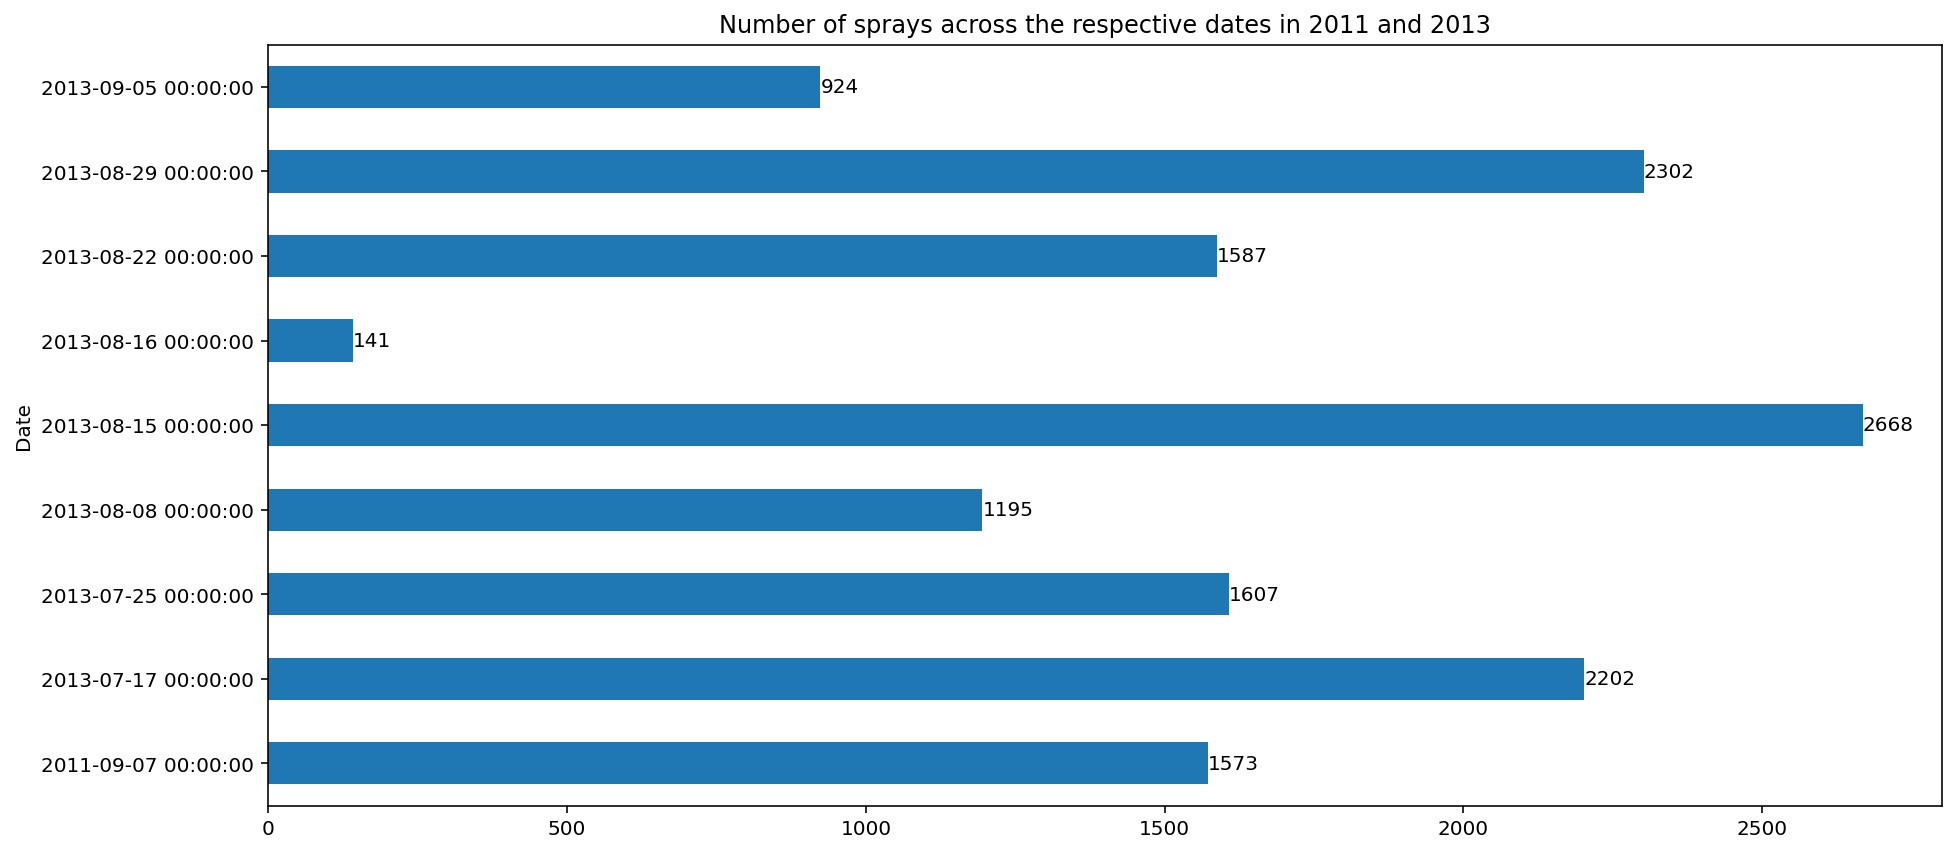

In [11]:
# draw a bar plot counting the number of sprays across the various dates (with count annotation)
sizes = spray.groupby(["Date"]).size()
sizes.plot(kind='barh',figsize=(15,7),title="Number of sprays across the respective dates in 2011 and 2013")

for y, x in enumerate(sizes):
    plt.annotate(str(x), xy=(x, y), va='center')

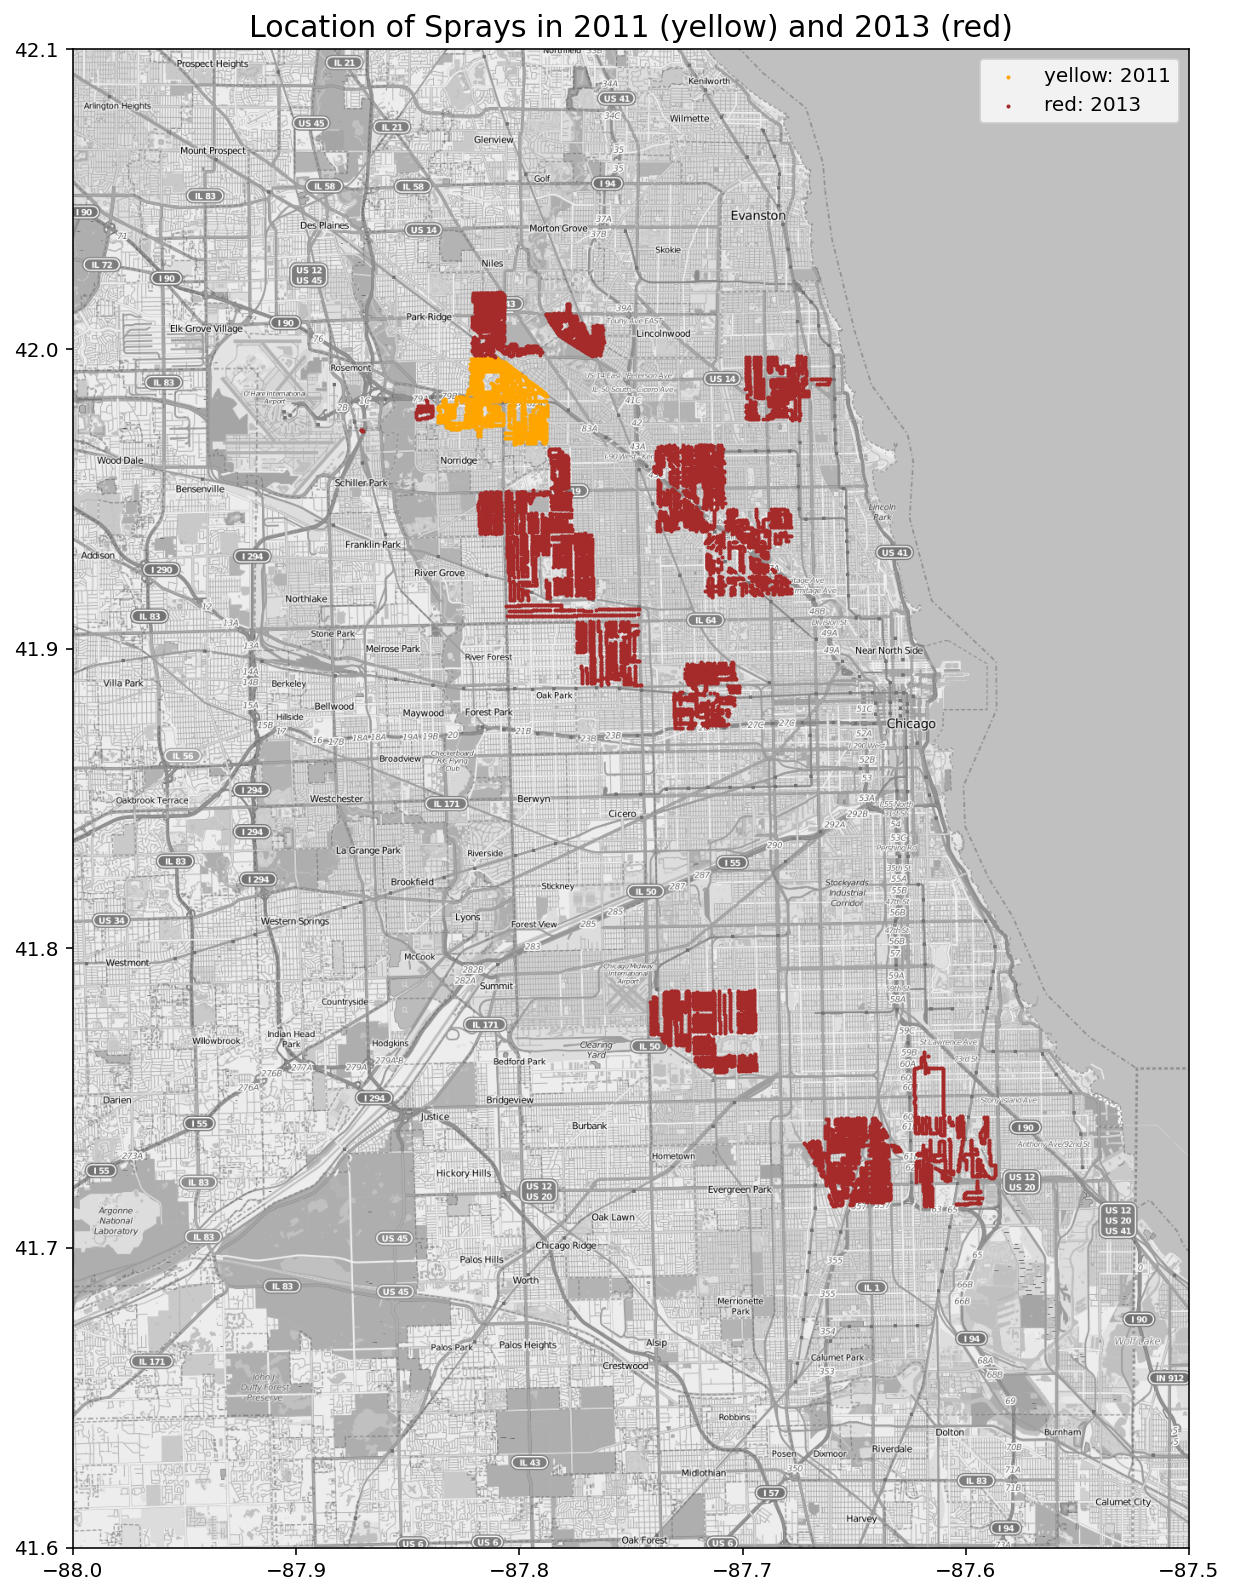

In [12]:
#plot locations of sprays
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

spray["Year"] = spray["Date"].dt.year
spray_2011 = spray.loc[spray["Year"]==2011]
spray_2013 = spray.loc[spray["Year"]==2013]
spray.drop(["Year"], axis=1, inplace=True)

sp_2011 = plt.scatter(spray_2011['Longitude'], spray_2011['Latitude'], c="orange", marker='o', s=1, alpha=1)
sp_2013 = plt.scatter(spray_2013['Longitude'], spray_2013['Latitude'], c="brown", marker='o', s=1, alpha=1)

plt.title("Location of Sprays in 2011 (yellow) and 2013 (red)", fontsize=15)
plt.legend((sp_2011, sp_2013), ("yellow: 2011", "red: 2013"))
plt.show();

## Saving cleaned dataset

In [13]:
spray.to_csv('../assets/spray_cleaned.csv', index=False)